In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import sys
import PIL
from PIL import Image
import os

In [2]:
# Part 1: Camera radiometric calibration
# 1.1 Read the Original Picture,crop out a central portion of each images

In [3]:

dirListing = os.listdir('./Resourse/calibration/')
list_im = []
for item in dirListing:
        list_im.append('./Resourse/calibration/'+item)
   

In [4]:
print(list_im)

['./Resourse/calibration/.DS_Store', './Resourse/calibration/8.JPG', './Resourse/calibration/9.JPG', './Resourse/calibration/10.JPG', './Resourse/calibration/4.JPG', './Resourse/calibration/5.JPG', './Resourse/calibration/7.JPG', './Resourse/calibration/6.JPG', './Resourse/calibration/2.JPG', './Resourse/calibration/3.JPG', './Resourse/calibration/1.JPG']


In [5]:
for i in list_im:
    if i == "./Resourse/calibration/.DS_Store":continue
    else:
        img = cv2.imread(i)
        #print(i)
        cropped = img[1500:1600, 2000:2100]
        filename = i.replace("calibration","crop")
        #print(filename)
        cv2.imwrite(filename,cropped)

In [6]:
#split the crop image into RGB 
for i in range (1,11):
    filename = "./Images/crop/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./cropB/" + str(i) + ".jpg"
    filenameR = "./cropR/" + str(i)  + ".jpg"
    filenameG = "./cropG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)



In [7]:
# 1.2 break down the original image into RGB channel

In [8]:
# average brighterness value

In [9]:
B = []
G = []
R = []
for i in range (1,11):
    filenameB = "./Images/crop/cropB/" + str(i) + ".jpg"
    filenameR = "./Images/crop/cropR/" + str(i)  + ".jpg"
    filenameG = "./Images/crop/cropG/" + str(i)  + ".jpg"
    BB = cv2.imread(filenameB)
    GG = cv2.imread(filenameG)
    RR = cv2.imread(filenameR)
    B1=BB[1]
    averageB = np.mean(B1.reshape(-1, 300), axis=1)*3
    c = averageB[0]
    B.append(c)
    
    G1=GG[1]
    averageG = np.mean(G1.reshape(-1, 300), axis=1)*3
    d = averageG[0]
    G.append(d)
    
    R1=RR[1]
    averageR = np.mean(R1.reshape(-1, 300), axis=1)*3
    e = averageR[0]
    R.append(e)
 

In [10]:
print(B)

[214.53000000000003, 194.2, 159.21, 130.64, 114.44, 95.53, 90.38, 70.86, 48.510000000000005, 36.18]


In [11]:
# RGB vs T

In [12]:
import matplotlib.pyplot as plt

In [13]:
T = [1/351,1/501,1/754,1/1008,1/1520,1/2037,1/3096,1/4167,1/6410,1/8772]

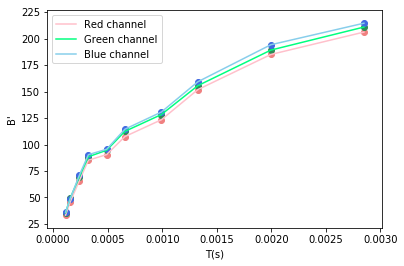

In [16]:

plt.plot(T, R, 'pink')
plt.scatter(T, R,color='lightcoral')

plt.plot(T, G, 'springgreen')
plt.scatter(T, G,color='seagreen')



plt.plot(T, B, 'skyblue')
plt.scatter(T, B,color='royalblue')

plt.xlabel('T(s)')
plt.ylabel('B\'')
plt.legend(('Red channel','Green channel','Blue channel'), loc = 'upper left')
plt.savefig("./Figure/Figure1/BT.png")
plt.show()

In [17]:
from math import log
B_log=[log(y,10) for y in B]
G_log=[log(y,10) for y in G]
R_log=[log(y,10) for y in R]
T_log=[log(y,10) for y in T]

In [18]:
x= np.asarray(T_log)
y= np.asarray(R_log)
yG= np.asarray(G_log)
yB= np.asarray(B_log)

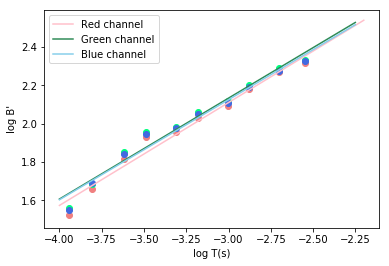

In [19]:
from sklearn.linear_model import LinearRegression
#https://jakevdp.github.io/PythonDataScienceHandbook/05.06-linear-regression.html

# Red channel
modelR = LinearRegression(fit_intercept=True)

modelR.fit(x[:, np.newaxis], y)

xfit = np.linspace(-4, -2.2, 100)
yfit = modelR.predict(xfit[:, np.newaxis])

plt.scatter(x, y, color ='lightcoral')
plt.plot(xfit, yfit,'pink')

#Green channel
modelG = LinearRegression(fit_intercept=True)

modelG.fit(x[:, np.newaxis], yB)

xfit = np.linspace(-4, -2.25, 100)
yfitB = modelG.predict(xfit[:, np.newaxis])

plt.scatter(x, yB, color ='springgreen')
plt.plot(xfit, yfitB,'seagreen')



#Blue channel
modelB = LinearRegression(fit_intercept=True)

modelB.fit(x[:, np.newaxis], yG)

xfit = np.linspace(-4, -2.25, 100)
yfitG = modelB.predict(xfit[:, np.newaxis])

plt.scatter(x, yG, color = 'royalblue')
plt.plot(xfit, yfitG,'skyblue' )


plt.legend(('Red channel','Green channel','Blue channel'), loc = 'upper left')



plt.xlabel('log T(s)')
plt.ylabel('log B\'')

plt.savefig("./Figure/Figure1/LinearRegression.png")

In [20]:
print("ModelR slope:    ", modelR.coef_[0])
print("ModelR intercept:", modelR.intercept_)

ModelR slope:     0.5362621842373625
ModelR intercept: 3.7188055835048934


In [21]:
print("ModelG slope:    ", modelG.coef_[0])
print("ModelG intercept:", modelG.intercept_)

ModelG slope:     0.5260671169773633
ModelG intercept: 3.7112562930468074


In [22]:
print("ModelB slope:    ", modelB.coef_[0])
print("ModelB intercept:", modelB.intercept_)

ModelB slope:     0.5214372505507467
ModelB intercept: 3.689125447417296


In [23]:
oneOverG = [modelR.coef_[0], modelG.coef_[0],modelB.coef_[0]]

In [24]:
print(oneOverG)

[0.5362621842373625, 0.5260671169773633, 0.5214372505507467]


In [25]:
gofB = [1/modelR.coef_[0], 1/modelG.coef_[0],1/modelB.coef_[0]]

In [26]:
print(gofB)

[1.864759495249764, 1.9008981320591267, 1.9177762979990227]


In [27]:
R_real = R**gofB[0]
G_real = G**gofB[1]
B_real = B**gofB[2]

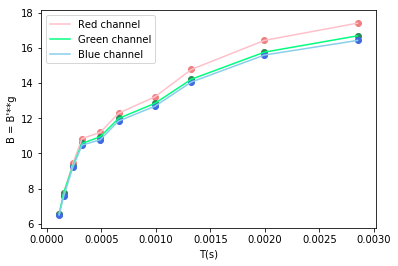

In [28]:
plt.plot(T, R_real, 'pink')
plt.scatter(T, R_real,color='lightcoral')

plt.plot(T, G_real, 'springgreen')
plt.scatter(T, G_real,color='seagreen')



plt.plot(T, B_real, 'skyblue')
plt.scatter(T, B_real,color='royalblue')

plt.xlabel('T(s)')
plt.ylabel('B = B\'**g')
plt.legend(('Red channel','Green channel','Blue channel'), loc = 'upper left')
plt.savefig("./Figure/Figure1/BrealT.png")
plt.show()

In [29]:
# Part 2: Acquire a picture stack

In [30]:
dirListing = os.listdir('./Images/HDRO/')
list_HDR = []
for item in dirListing:
        list_HDR.append('./Images/HDRO/'+item)

In [31]:
print(list_HDR)

['./Images/HDRO/.DS_Store', './Images/HDRO/HDROR', './Images/HDRO/HDROG', './Images/HDRO/HDROB', './Images/HDRO/2.JPG', './Images/HDRO/3.JPG', './Images/HDRO/1.JPG']


In [32]:
del list_HDR[0]

In [33]:
print(list_HDR)

['./Images/HDRO/HDROR', './Images/HDRO/HDROG', './Images/HDRO/HDROB', './Images/HDRO/2.JPG', './Images/HDRO/3.JPG', './Images/HDRO/1.JPG']


In [34]:
for i in range (1,4):
    filename = "./Images/HDRO/" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./Images/HDRO/HDROB/" + str(i) + ".jpg"
    filenameR = "./Images/HDRO/HDROR/" + str(i)  + ".jpg"
    filenameG = "./Images/HDRO/HDROG/" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)




In [35]:
TofHDR=[1/180,1/351,1/2037]

In [36]:
print(gofB[1])

1.9008981320591267


In [37]:
filenameR = "./HDROR/" + str(1)  + ".jpg"
img = cv2.imread(filenameR)

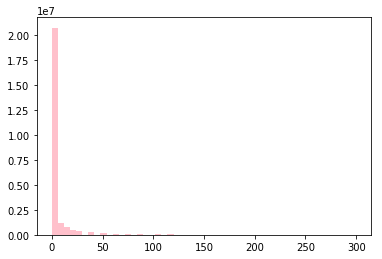

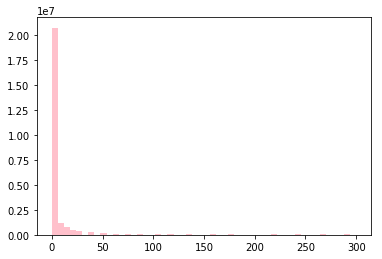

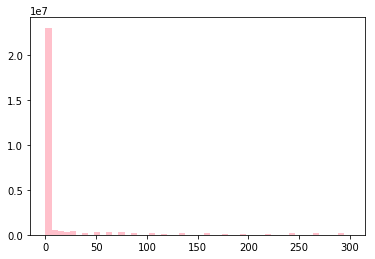

In [38]:
#Red channel
for i in range (1,4):
    filenameR = "./Images/HDRO/HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(np.power(img.ravel().astype(float),gofB[0]) ,50,[0,300],color = "pink") 
    plt.savefig("./Figure/Figure2.2/originalred"+str(i)+".png")
    plt.show() 
   

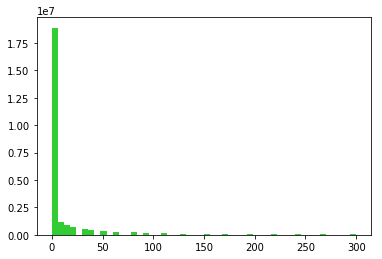

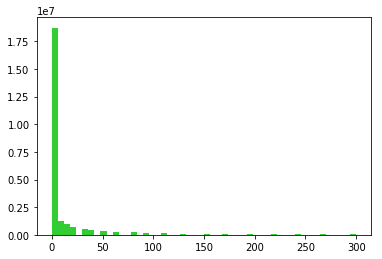

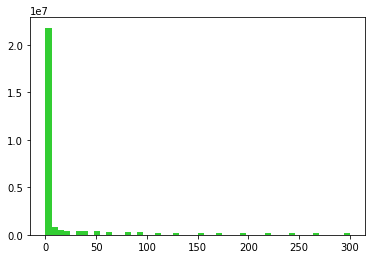

In [39]:
#Green channel
for i in range (1,4):
    filenameG = "./Images/HDRO/HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(np.power(img.ravel().astype(float),gofB[1]),50,[0,300],color = "limegreen") 
    plt.savefig("./Figure/Figure2.2/originalgreen"+str(i)+".png")
    plt.show() 
    

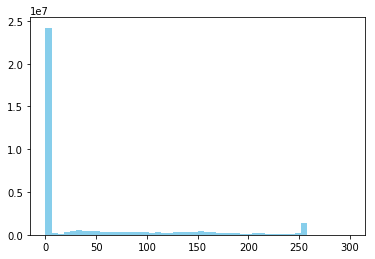

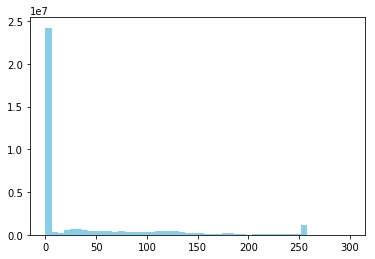

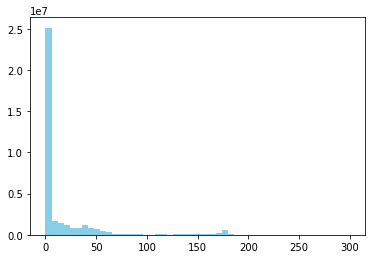

In [40]:
#Blue channel
for i in range (1,4):
    filenameB = "./Images/HDRO/HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float),50,[0,300],color = "skyblue") 
    plt.savefig("./Figure/Figure2.2/originalblue"+str(i)+".png")
    plt.show() 
   

In [41]:
# a1 = 5.80342

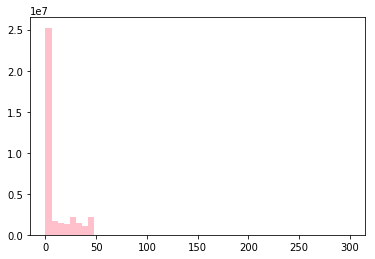

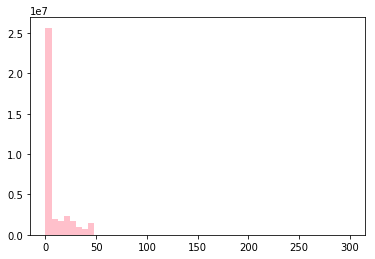

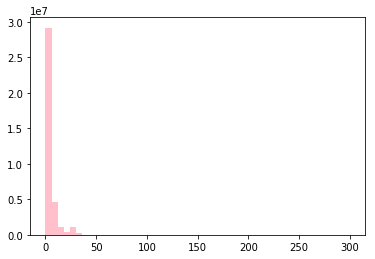

In [42]:
#Red channel
for i in range (1,4):
    filenameR = "./Images/HDRO/HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(img.ravel().astype(float)/5.80342,50,[0,300],color = "pink") 
    plt.savefig("./Figure/Figure2.3/a5/a5r"+str(i)+".png")
    plt.show() 
   

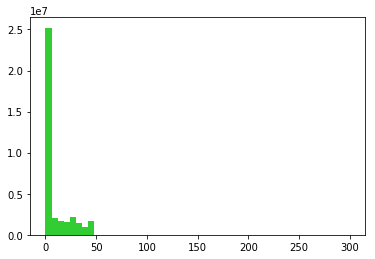

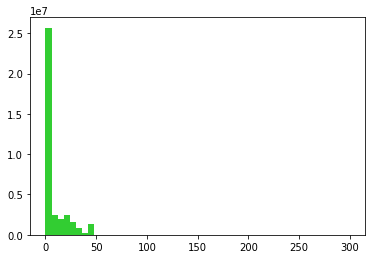

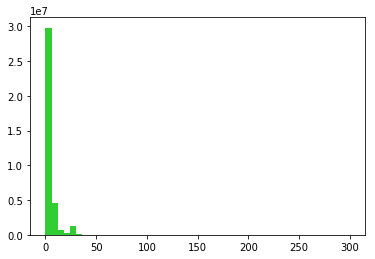

In [43]:
#Green channel
for i in range (1,4):
    filenameG = "./Images/HDRO/HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(img.ravel().astype(float)/5.80342,50,[0,300],color = "limegreen") 
    plt.savefig("./Figure/Figure2.3/a5/a5g"+str(i)+".png")
    plt.show() 
    

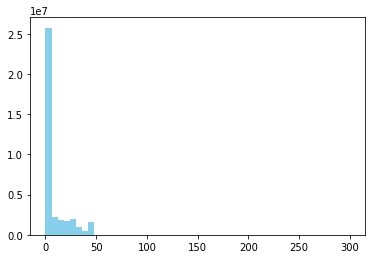

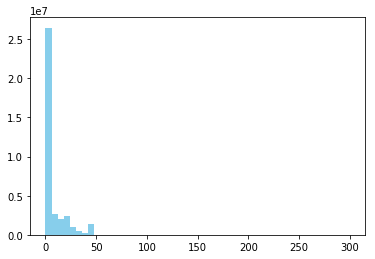

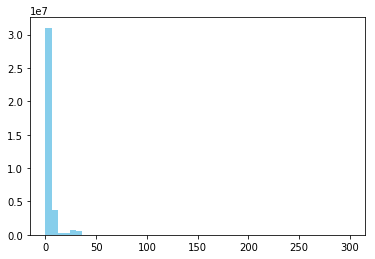

In [44]:
#Blue channel
for i in range (1,4):
    filenameB = "./Images/HDRO/HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float) /5.80342,50,[0,300],color = "skyblue") 
    plt.savefig("./Figure/Figure2.3/a5/a5b"+str(i)+".png")
    plt.show() 
   

In [45]:
# a2 = 11.3167

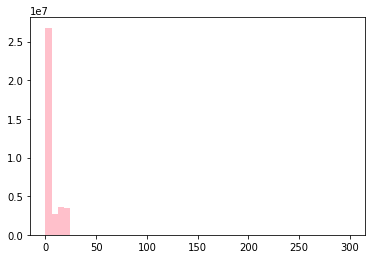

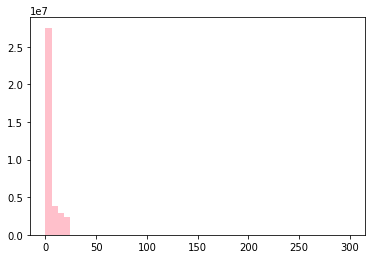

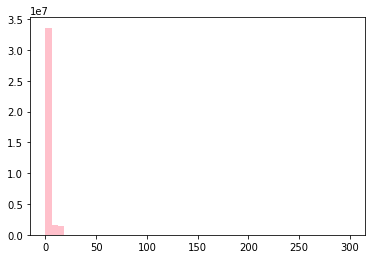

In [46]:
#Red channel
for i in range (1,4):
    filenameR = "./Images/HDRO/HDROR/" + str(i)  + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "pink") 
    plt.savefig("./Figure/Figure2.3/a10/a10r"+str(i)+".png")
    plt.show() 
   

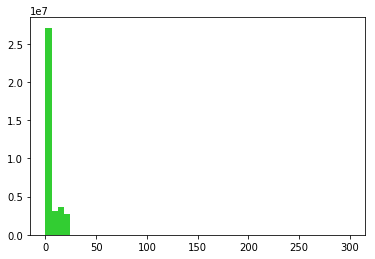

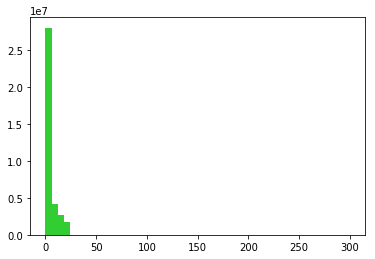

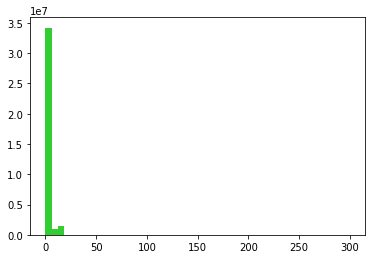

In [47]:
#Green channel
for i in range (1,4):
    filenameG = "./Images/HDRO/HDROG/" + str(i)  + ".jpg"
    img = cv2.imread(filenameG)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "limegreen") 
    plt.savefig("./Figure/Figure2.3/a10/a10g"+str(i)+".png")
    plt.show() 
    

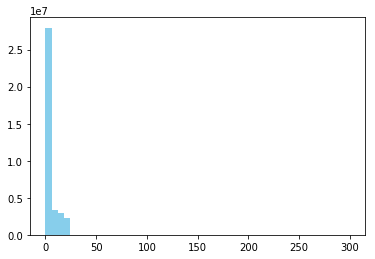

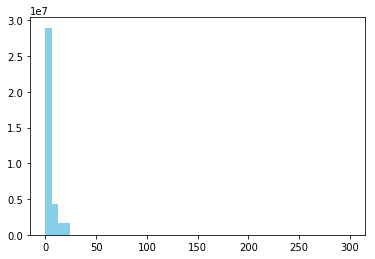

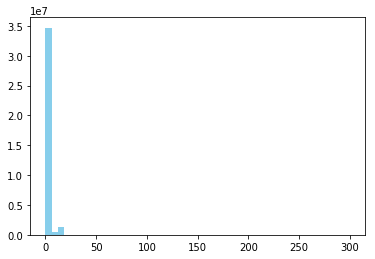

In [48]:
#Blue channel
for i in range (1,4):
    filenameB = "./Images/HDRO/HDROB/" + str(i)  + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float) /11.3167,50,[0,300],color = "skyblue") 
    plt.savefig("./Figure/Figure2.3/a10/a10b"+str(i)+".png")
    plt.show() 
   

In [49]:
# Part 4: Reproduce composite image

In [50]:
# image

In [51]:

img1 = cv2.imread("./Images/HDRO/1.jpg")
img2 = cv2.imread("./Images/HDRO/2.jpg")
img3 = cv2.imread("./Images/HDRO/3.jpg")


In [52]:
img1.shape

(3024, 4032, 3)

In [53]:
img2.shape

(3024, 4032, 3)

In [54]:
img3.shape

(3024, 4032, 3)

In [55]:
HDR1 = np.zeros(img1.shape)
HDR2 = np.zeros(img1.shape)

In [60]:
#HDR 1
for c in range(3):
    for i in range(3024):
        for j in range(4032):
            if(img2[i,j,c]>255):
                HDR1[i,j] = img1[i,j]**gofB[c]
            elif((img3[i,j,c]>255) & (img2[i,j,c]< 255)):
                HDR1[i,j] = img2[i,j]**gofB[c]/5.80342
            else:
                HDR1[i,j] = img3[i,j]**gofB[c]/11.3167


In [62]:
cv2.imwrite("HDR1.jpg",HDR1)

True

In [61]:
# HDR 2
for c in range(3):
    for i in range(3024):
        for j in range(4032):
            if(img3[i,j,c]<255):
                HDR2[i,j]=(img1[i,j]**gofB[c]+img2[i,j]**gofB[c]/5.80342)/2
            if(img2[i,j,c]<255):
                HDR2[i,j]=(img1[i,j]**gofB[c]+img3[i,j]**gofB[c]/11.3167)/2
            if(img1[i,j,c]<255):
                HDR2[i,j]=(img2[i,j]**gofB[c]/5.80342+img3[i,j]**gofB[c]/11.3167)/2
            if(img1[i,j,c]<255 & img2[i,j,c]<255 & img3[i,j,c]<255):
                HDR2[i,j]=(img1[i,j]**gofB[c]+img2[i,j]**gofB[c]/5.80342+img3[i,j]**gofB[c]/11.3167)/3


In [63]:
cv2.imwrite("HDR2.jpg",HDR2)

True

In [64]:
# Part 3: Create a composite image

In [65]:
for i in range (1,3):
    filename = "./HDR" + str(i) + ".jpg"
    #print(filename)
    image = cv2.imread(filename)
    filenameB = "./Images/HDR/HDRB" + str(i) + ".jpg"
    filenameR = "./Images/HDR/HDRR" + str(i)  + ".jpg"
    filenameG = "./Images/HDR/HDRG" + str(i)  + ".jpg"
    image = cv2.imread(filename)

    b = image.copy()
    # set green and red channels to 0
    b[:, :, 1] = 0
    b[:, :, 2] = 0


    g = image.copy()
    # set blue and red channels to 0
    g[:, :, 0] = 0
    g[:, :, 2] = 0

    r = image.copy()
    # set blue and green channels to 0
    r[:, :, 0] = 0
    r[:, :, 1] = 0
    
    #RGB - Blue
    cv2.imwrite(filenameB,b)
    # RGB - Green
    cv2.imwrite(filenameG,g)
    # RGB Red
    cv2.imwrite(filenameR,r)



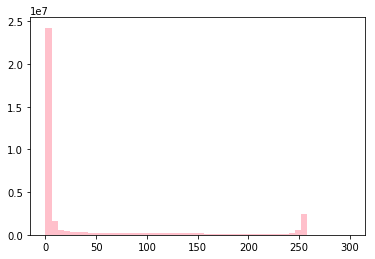

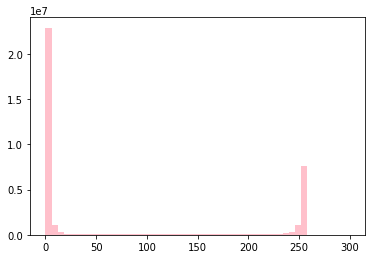

In [69]:
#Red channel
for i in range (1,3):
    filenameR = "./Images/HDR/HDRR" + str(i) + ".jpg"
    img = cv2.imread(filenameR)
    plt.hist(img.ravel().astype(float),50,[0,300],color = "pink") 
    plt.savefig("./Figure/Figure3/HDRRH"+str(i)+".png")
    plt.show() 

./Images/HDR/HDRG1.jpg


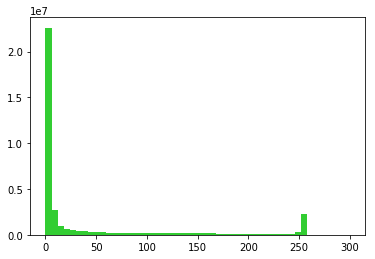

./Images/HDR/HDRG2.jpg


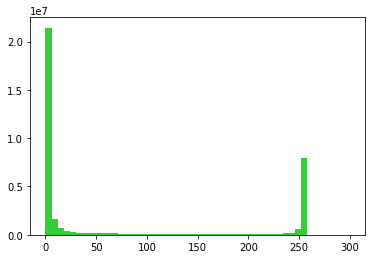

In [73]:
#Green channel
for i in range (1,3):
    filenameG = "./Images/HDR/HDRG" + str(i) + ".jpg"
    print(filenameG)
    img = cv2.imread(filenameG)
    plt.hist(img.ravel().astype(float),50,[0,300],color = "limegreen") 
    plt.savefig("./Figure/Figure3/HDRGH"+str(i)+".png")
    plt.show() 
    

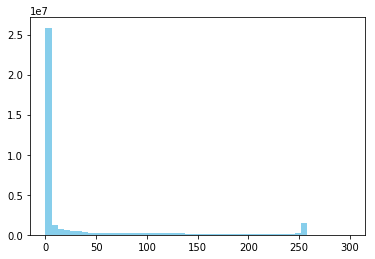

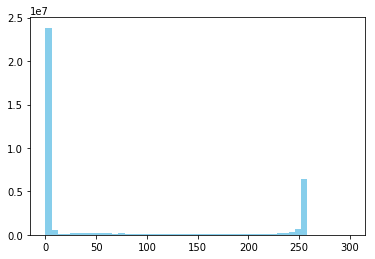

In [74]:
#Blue channel
for i in range (1,3):
    filenameB = "./Images/HDR/HDRB" + str(i) + ".jpg"
    img = cv2.imread(filenameB)
    plt.hist(img.ravel().astype(float),50,[0,300],color = "skyblue") 
    plt.savefig("./Figure/Figure3/HDRBH"+str(i)+".png")
    plt.show() 